# Weekly Project Stereo camera calibration
our task is to undistort and rectify the images, such that they can be used with the stereo depth reconstruction you made on day 6.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
def calibration(filepathL, filePathR):
    # Implement the number of vertical and horizontal corners
    nb_vertical = 9
    nb_horizontal = 6
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
    objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)*33.6
    
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpointsL = [] # 2d points in image plane.
    imgpointsR = []
    
    imagesL = glob.glob('rs/left-*.png')#'rs/left-*.png'
    imagesR = glob.glob('rs/right-*.png')
    assert imagesL
    assert imagesR
    assert len(imagesL) == len(imagesR)
    
    for index,_ in enumerate(imagesL):
        fnameL, fnameR = imagesL[index], imagesR[index]
        imgL = cv2.imread(fnameL)
        imgR = cv2.imread(fnameR)
        grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
        grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

        # Implement findChessboardCorners 
        retL, cornersL = cv2.findChessboardCorners(grayL, (nb_vertical,nb_horizontal), None)
        retR, cornersR = cv2.findChessboardCorners(grayR, (nb_vertical,nb_horizontal), None)
    
        # If found, add object points, image points (after refining them)
        if retL == True and retR == True:
            objpoints.append(objp)
            imgpointsL.append(cornersL)
            imgpointsR.append(cornersR)
    imgsize = imgL.shape[:2] 
    
    mtxL = cv2.UMat()
    mtxR = cv2.UMat()
    distL = cv2.UMat()
    distR = cv2.UMat()
    R, T, E, F = cv2.UMat(), cv2.UMat(), cv2.UMat(), cv2.UMat()
    return cv2.stereoCalibrate(objpoints, imgpointsL, imgpointsR, mtxL, distL, mtxR, distR,imgsize,R,T,E,F)

In [3]:
leftPath = 'rs/left-*.png'
rightPath = 'rs/right-*.png'

retStero, mtxL, distL, mtxR, distR, R, T, E, F = calibration(leftPath, rightPath)

In [4]:
size = cv2.imread('rs/left-0000.png').shape[0:2]
assert size
R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(mtxL, distL, mtxR, distR, size, R, T, flags=cv2.CALIB_ZERO_DISPARITY, alpha=-1) 

In [5]:
#validPixROI1,validPixROI2
validPixROI1

(0, 0, 0, 0)

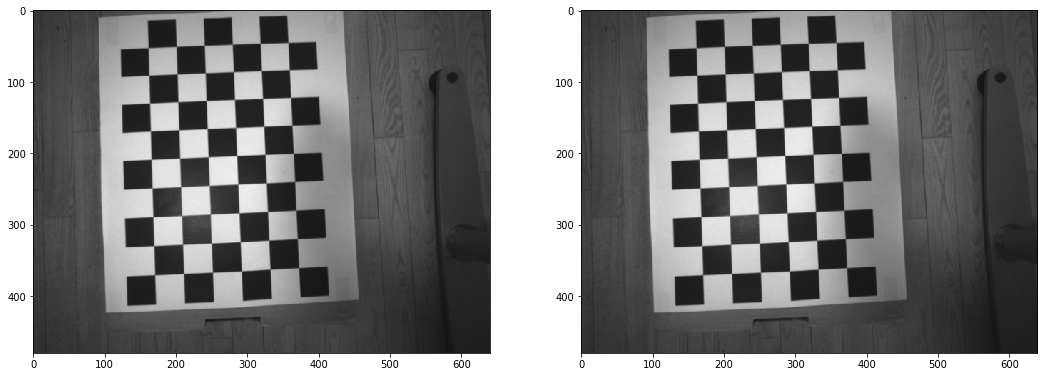

In [6]:
imgL = cv2.imread('rs/left-0010.png')
imgL_dst = cv2.undistort(imgL, mtxL, distL).get()
imgR = cv2.imread('rs/right-0010.png')
imgR_dst = cv2.undistort(imgR, mtxR, distR).get()
type(imgL_dst)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(imgR)
ax[1].imshow(imgR_dst)